In [35]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [36]:
# Process weird date formats 
def normalize_dates(date):
    try:
        return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    except:
        return datetime.strptime(date[:-7], '%Y-%m-%d %H:%M:%S')

In [37]:
# This contains ALL our reporting experiment data, but includes some invalid data in 2019 due to faulty thresholds 
# filepath = "/data/databases/erroneous_reporting_experiment_data.csv"

# This is our main data-set
filepath = "/data/databases/reporting_experiment.csv"

df = pd.read_csv(filepath)

In [38]:
df.shape[0], df.dropna().shape[0]

(250423, 17767)

In [39]:
df['created'] = df['created_utc'].apply(normalize_dates)
df['ingested'] = df['ingested_utc'].apply(normalize_dates)

In [40]:
print("Total number of comments ingested by Crossmod during the experiment = ", df.shape[0])
print("Total number of comments reported by Crossmod during the experiment = ", df[df.crossmod_action == "report"].shape[0])
print("% of comments reported by Crossmod during the experiment = ", 100.0 * df[df.crossmod_action == "report"].shape[0]/df.shape[0], "%")
print("Total number of comments removed by moderators during the experiment = ", df[df.banned_by.notna()].shape[0])
print("% of comments removed by moderators during the experiment = ", 100.0 * df[df.banned_by.notna()].shape[0]/df.shape[0], "%")

Total number of comments ingested by Crossmod during the experiment =  250423
Total number of comments reported by Crossmod during the experiment =  2686
% of comments reported by Crossmod during the experiment =  1.0725851858655155 %
Total number of comments removed by moderators during the experiment =  17767
% of comments removed by moderators during the experiment =  7.0947956058349275 %


In [41]:
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('banned_by')['banned_by'].transform('count')
sub_df[['banned_by', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,banned_by,freq
12,AutoModerator,10789
20379,Agent_03,1658
518,lughnasadh,1518
20530,iTwalkers,736
2,V2O5,651
1945,lord_stryker,346
41414,Blank-Cheque,315
5092,ion-tom,314
2591,Stuttero,282
40424,KKalebBB,194


In [42]:
df.shape, df[df.agreement_score.notna()].shape

((250423, 15), (250423, 15))

# Automod removals

In [43]:
print("Total number of comments removed by AutoModerator during the experiment = ", df[df.banned_by == "AutoModerator"].shape[0])
print("% of removed comments that were removed by AutoModerator during the experiment = ", int(100.0 * df[df.banned_by == "AutoModerator"].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , int(100.0*df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0]/df[(df.banned_by == "AutoModerator")].shape[0]), "%")

Total number of comments removed by AutoModerator during the experiment =  10789
% of removed comments that were removed by AutoModerator during the experiment =  60 %
Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  304
% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  2 %


# Human moderator removals

In [44]:
print("Total number of comments removed by human moderators during the experiment = ", df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of removed comments that were removed by human mods during the experiment = ", int(100.0 * df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", int(100*df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]), "%")

Total number of comments removed by human moderators during the experiment =  6978
% of removed comments that were removed by human mods during the experiment =  39 %
Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  1626
% of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  23 %


# Crossmod reports

In [45]:
print("Total number of comments reported by Crossmod during the experiment = ", df[df.crossmod_action == "report"].shape[0])
print("% comments ingested that were reported by Crossmod during the experiment = ", int(100.0 * df[df.crossmod_action == "report"].shape[0]/df.shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed during the experiment = ", df[(df.crossmod_action == "report") & (df.banned_by.notna())].shape[0])
print("% of comments reported by Crossmod that were subsequently removed during the experiment = ", int(100.0 * df[(df.crossmod_action == "report") & (df.banned_by.notna())].shape[0]/df[df.crossmod_action == "report"].shape[0]), "%")

Total number of comments reported by Crossmod during the experiment =  2686
% comments ingested that were reported by Crossmod during the experiment =  1 %
Number of comments reported by Crossmod that were subsequently removed during the experiment =  1930
% of comments reported by Crossmod that were subsequently removed during the experiment =  71 %


# FALSE POSITIVES - 

In [46]:
for comment in df[(df.crossmod_action == "report") & (df.banned_by.isna())].body[:100]:
    print(comment)
    print("----------------------")

Excuuuuuse me for not knowing EVERYTHING like you obviously do.  Eat downvotes, ass.
----------------------
No one cares that you’re a bad person AND unfashionable.
----------------------
Fuck Trump.

And fuck anyone stupid enough to have supported him for even one second.
----------------------
Title Holder: Donald J. Trump “Worst Person Ever Born”
----------------------
Trump one last "fuck you" before he hopefully gets kicked.
----------------------
Things where worse before Obama you dumb Trumper! Seriously you trumpers are ignoring that huge fact! Sorry but dumb fuck trump who wants to dump pesticides in our rivers and lakes can get fucked. He's just mad Obama did it and Obama was a times person of the year.
----------------------
The people who support Trump are disgusting people
----------------------
Dude you brought up greta because you have no arguments not based on outrage porn you swallow. Not,everyone is obsessed with your imagined culture war, its so pathetic.
-----------

# FALSE NEGATIVES - 

In [47]:
for comment in df[(df.crossmod_action != "report") & (df.banned_by.notna())].body[:100]:
    print(comment)
    print("----------------------")

>Nope. They are about in the middle:   
>  
>https://ec.europa.eu/eurostat/statistics-explained/index.php/Electricity\_price\_statistics

Fine was mostly referring to non-former-soviet-bloc nations. Former USSR nations have exceptionally cheap electricity due to lower labor costs and laxer safety / environmental standards. Most of the nations with electricity cheaper than France are primarily coal-based.   


>  
 Germany and Denmark are the most expensive for consumers in this regard, so they are the extreme outliers. Ukraine has electricity 1/4 the price of France, for example. France has electricity prices similar to Sweden, but more expensive than Finland or Iceland, for context..

Finland, Iceland, Norway, etc have cheaper electricity but that is largely due to the vast amount of hydro resources they have. Hydro is definitely cheaper than nuclear under the right circumstances but requires certain geography. Germany is a perfect comparison due to similar geography, climate, develop

# Users who've been reported and removed multiple times

In [48]:
#author posting volumes
sub_df = df
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

,author,freq
84856,CivilServantBot,1431
2957,kernals12,796
1412,OliverSparrow,616
2234,Agent_03,518
114,Memetic1,484
...,...,...
91300,NappingYG,1
91302,AT1313,1
91304,runetrantor,1
91307,BCSteve,1


In [49]:
#author removal volumes
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
24255,only-answer-no,183
8428,PatriotMinear,34
11980,r1xlx,28
6321,Ford456fgfd,24
222080,Speedster4206,23
...,...,...
48308,RickSanchezzC137,1
48318,paulwesley91,1
48329,tidho,1
48346,jmc15john,1


In [50]:
#author reported volumes
sub_df = df[df.crossmod_action == "report"]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
84856,CivilServantBot,24
2101,captain-ding-a-ling,9
225753,Saichotic,9
179705,downvotedreality,8
115135,xcvas,6
...,...,...
73926,gemlarin,1
73809,Fisterbrother,1
73712,Dram1us,1
73502,I_Drink_Diarrhea,1


In [51]:
#author mis-reported volumes
sub_df = df[(df.crossmod_action == "report") & (df.banned_by.notna())]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
2101,captain-ding-a-ling,8
225753,Saichotic,8
179705,downvotedreality,7
115135,xcvas,6
97361,MatrimofRavens,5
...,...,...
69176,Uridon2,1
69101,Jertee,1
69089,ThaneWestbrook,1
69066,neonlightdistrict,1


# Response time

In [52]:
df[df.banned_by != "AutoModerator"][["created_utc", "banned_at_utc", "banned_by"]].dropna()

,created_utc,banned_at_utc,banned_by
2,2020-01-22 19:37:22.000000,2020-01-22 20:18:42.000000,V2O5
61,2020-01-22 20:17:40.000000,2020-01-22 20:18:35.000000,V2O5
109,2020-01-22 21:01:40.000000,2020-01-22 23:05:48.000000,V2O5
197,2020-01-22 21:56:42.000000,2020-01-23 02:22:33.000000,ekser
231,2020-01-22 22:22:02.000000,2020-01-23 02:22:26.000000,ekser
...,...,...,...
241927,2020-05-22 10:18:07.000000,2020-05-22 12:17:46.000000,Agent_03
241939,2020-05-22 10:29:09.000000,2020-05-22 12:34:47.000000,Agent_03
241983,2020-05-22 11:20:42.000000,2020-05-22 12:42:38.000000,Agent_03
242465,2020-05-22 15:28:04.000000,2020-05-22 15:59:31.000000,1


In [53]:
sub_df = df.dropna()
created = []
banned = []
misses = 0

sub_df['created'] = sub_df['created_utc'].apply(normalize_dates)
sub_df['banned'] = sub_df['banned_at_utc'].apply(normalize_dates)

sub_df['response_time'] = sub_df['banned'] - sub_df['created']

seconds = []
for x in sub_df['response_time']:
    seconds.append(x.total_seconds())
    
sub_df['response_time'] = seconds

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [66]:
sub_df = sub_df[sub_df.banned_by != "AutoModerator"]
sub_df.response_time.mean(), sub_df.response_time.median(), sub_df.response_time.max(), sub_df.response_time.min()
print("Mean Human Moderator Response Time (sec)", sub_df.response_time.mean())
print("Mean Human Moderator Response Time (hours)", sub_df.response_time.mean() / 3600)
print("Median Human Moderator Response Time (hours)", sub_df.response_time.median())
print("Median Human Moderator Response Time (sec)", sub_df.response_time.median())
print("Min Human Moderator Response Time (sec)", sub_df.response_time.min())
print("Max Human Moderator Response Time (sec)", sub_df.response_time.max())

Mean Human Moderator Response Time (sec) 367789.1319862425
Mean Human Moderator Response Time (hours) 102.16364777395624
Median Human Moderator Response Time (hours) 20554.5
Median Human Moderator Response Time (sec) 20554.5
Min Human Moderator Response Time (sec) 0.0
Max Human Moderator Response Time (sec) 8811679.0


# Plots

In [67]:
import matplotlib.pyplot as plt
import seaborn

# Plot Parameters

# Agreement Score Parameters: Choose starting and ending agreement score thresholds, and how many intervals between them.
agreement_score_start = 50
agreement_score_end = 100
delta = 5
agreement_scores = [i * 0.01 for i in range(agreement_score_start, agreement_score_end, delta)]

# Finding the starting and ending ingested_utc in the dataset
min_date = df['ingested'].min()
max_date = df['ingested'].max()

In [68]:
##############################################################
# Change bucket size (in days) for smoother rates
##############################################################
bucket_size = 10
##############################################################
def normalize_rate(raw_metric, daily_comments):
    assert len(raw_metric) == len(daily_comments)
    normalized_metric = []
    for (i, metric) in enumerate(raw_metric):
        if daily_comments[i] == 0:
            normalized_metric.append(0)
        else:
            normalized_metric.append(metric/daily_comments[i])
    return normalized_metric
##############################################################
# Dates based on bucket size
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]

In [154]:
# Name of metrics is from the 
# filename column here: https://www.notion.so/adishy/05648dd33f1d4a90b62e3d79c480fe2f?v=21a1ea0f20514cc98b38ff64c8d17fd2
# without the "re" prefix
def save_metric(plt, filename):
    plt.savefig(f"/data/notebook_metrics/reporting-experiment/re_{filename}.png", dpi=700)

## Median human moderator response time during the Reporting Experiment

In [93]:
# Moderator response time dataframe

mod_response_time_df = df[df.banned_by != "AutoModerator"][["created_utc", "banned_at_utc", "banned_by"]].dropna()
mod_response_time_df['created'] = mod_response_time_df['created_utc'].apply(normalize_dates)
mod_response_time_df['banned'] = mod_response_time_df['banned_at_utc'].apply(normalize_dates)
mod_response_time_df['mod_response_time'] = [ 
                                      time.total_seconds() for time in \
                                      (mod_response_time_df['banned'] - mod_response_time_df['created'])
                                    ]


avg_mod_response_time = mod_response_time_df.mean()
median_mod_response_time = mod_response_time_df.median()
max_mod_response_time = mod_response_time_df.max()
min_mod_response_time = mod_response_time_df.min()

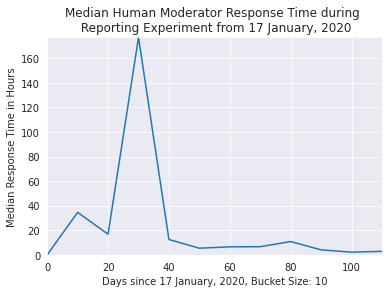

In [155]:
# Median human moderator response time during the Reporting Experiment
def mod_response_time_between_dates(start_date, end_date):
    return mod_response_time_df[(mod_response_time_df.created >= start_date) \
                                 & (mod_response_time_df.created < end_date)
                                 &  (mod_response_time_df.banned_by.notnull())]['mod_response_time'].median()

median_response_time = [0] + [mod_response_time_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                           min_date + timedelta(days = dates[i])) / 3600 
                            for i in range(1, len(dates))]

x_axis = 'days'
y_axis = 'average_response_time'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: median_response_time}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Median Human Moderator Response Time during \n Reporting Experiment from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel('Median Response Time in Hours')     
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(median_response_time))
##############################################################
save_metric(plt, "human_mod_response_time")
plt.show()

## Median AutoModerator response time during the Reporting Experiment

In [96]:
# AutoModerator response time dataframe

automoderator_response_time_df = df[df.banned_by == "AutoModerator"][["created_utc", "banned_at_utc", "banned_by"]].dropna()
automoderator_response_time_df['created'] = automoderator_response_time_df['created_utc'].apply(normalize_dates)
automoderator_response_time_df['banned'] = automoderator_response_time_df['banned_at_utc'].apply(normalize_dates)
automoderator_response_time_df['automoderator_response_time'] = [ 
                                      time.total_seconds() for time in \
                                      (automoderator_response_time_df['banned'] - automoderator_response_time_df['created'])
                                    ]


avg_automoderator_response_time = automoderator_response_time_df.mean()
median_automoderator_response_time = automoderator_response_time_df.median()
max_automoderator_response_time = automoderator_response_time_df.max()
min_automoderator_response_time = automoderator_response_time_df.min()

automoderator_response_time_df.mean(), automoderator_response_time_df.median()

(automoderator_response_time    31865.532487
 dtype: float64,
 automoderator_response_time    1.0
 dtype: float64)

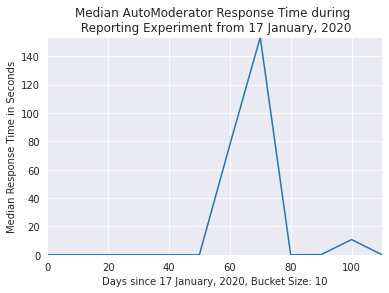

In [157]:
# Median Automoderator response time during the Reporting Experiment
def automoderator_response_time_between_dates(start_date, end_date):
    return automoderator_response_time_df[(automoderator_response_time_df.created >= start_date) \
                                           & (automoderator_response_time_df.created < end_date)]['automoderator_response_time'].median()

avg_response_time = [0] + [automoderator_response_time_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                                     min_date + timedelta(days = dates[i])) / 3600
                            for i in range(1, len(dates))]

x_axis = 'days'
y_axis = 'average_response_time'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: avg_response_time}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Median AutoModerator Response Time during \n Reporting Experiment from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel('Median Response Time in Seconds')     
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(avg_response_time))
##############################################################
save_metric(plt, "automoderator_response_time")
plt.show()

## Median Crossmod response time during the Reporting Experiment

In [73]:
# Crossmod response time dataframe

crossmod_response_time_df = df[df.crossmod_action == "report"][["created_utc", "ingested_utc"]].dropna()
crossmod_response_time_df['created'] = crossmod_response_time_df['created_utc'].apply(normalize_dates)
crossmod_response_time_df['ingested'] = crossmod_response_time_df['ingested_utc'].apply(normalize_dates)
crossmod_response_time_df['crossmod_response_time'] = [ 
                                      time.total_seconds() for time in \
                                      (crossmod_response_time_df['ingested'] - crossmod_response_time_df['created'])
                                    ]


avg_crossmod_response_time = crossmod_response_time_df.mean()
median_crossmod_response_time = crossmod_response_time_df.median()
max_crossmod_response_time = crossmod_response_time_df.max()
min_crossmod_response_time = crossmod_response_time_df.min()
crossmod_response_time_df.mean(), crossmod_response_time_df.median()

(crossmod_response_time    33.217796
 dtype: float64,
 crossmod_response_time    11.0
 dtype: float64)

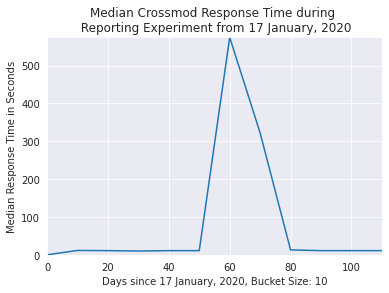

In [158]:
# Median Crossmod response time during the Reporting Experiment
def crossmod_response_time_between_dates(start_date, end_date):
    return crossmod_response_time_df[(crossmod_response_time_df.created >= start_date) \
                                           & (crossmod_response_time_df.created < end_date)]['crossmod_response_time'].median()

avg_response_time = [0] + [crossmod_response_time_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                                min_date + timedelta(days = dates[i]))
                            for i in range(1, len(dates))]

x_axis = 'days'
y_axis = 'average_response_time'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: avg_response_time}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Median Crossmod Response Time during \n Reporting Experiment from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel('Median Response Time in Seconds')     
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(avg_response_time))
##############################################################
save_metric(plt, "crossmod_response_time")
plt.show()

## Distribution of Length of Comments that were Removed by Moderators

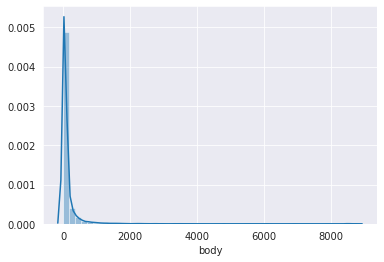

In [159]:
dist_plot = seaborn.distplot(df[df.banned_by.notnull()]["body"].str.len())
save_metric(plt, "removed_comment_distribution")
plt.show()

## Distribution of Length of Comments that were Reported by Crossmod

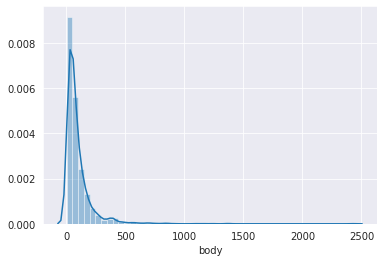

In [160]:
dist_plot = seaborn.distplot(df[df.crossmod_action == "report"]["body"].str.len())
save_metric(plt, "reported_comment_distribution")
plt.show()

## Agreement Score vs. Number of Comments

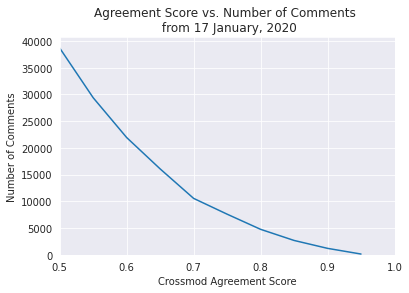

In [161]:
#Agreement Scores vs. Number of Comments
def comments_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold)].shape[0]    
number_of_comments = [comments_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_comments) + 2000)
##############################################################
save_metric(plt, "agreement_score_vs_comments")
plt.show()

## Agreement Score vs. Number of True Positives

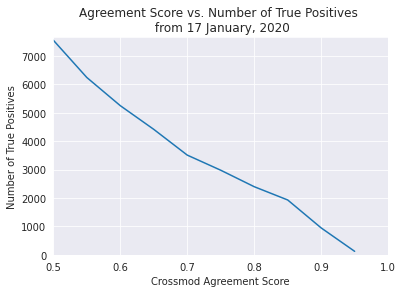

In [162]:
#Agreement Scores vs. Number of True Positives
def true_positives_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
number_of_true_positives = [true_positives_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_true_positives'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_true_positives},columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_true_positives) + 100)
##############################################################
save_metric(plt, "agreement_score_true_positives")
plt.show()

## Agreement Score vs. Ratio of True Positives to Total Comments at Threshold

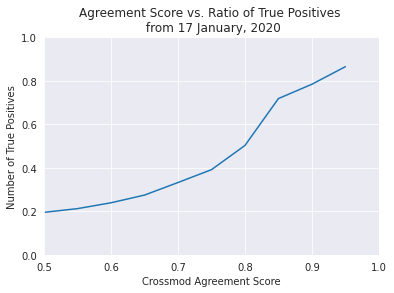

In [163]:
#Agreement Scores vs. Ratio of True Positives
def ratio_of_true_positives(agreement_score_threshold):
    true_positives = df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
    total_at_threshold = df[(df.agreement_score >= agreement_score_threshold)].shape[0]
    return true_positives / total_at_threshold
ratios = [ratio_of_true_positives(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'ratios'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: ratios}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Ratio of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0*0.01, 100*0.01)
##############################################################
save_metric(plt, "agreement_score_true_positives_ratio")
plt.show()

## Total Number of Comments Posted on Subreddit

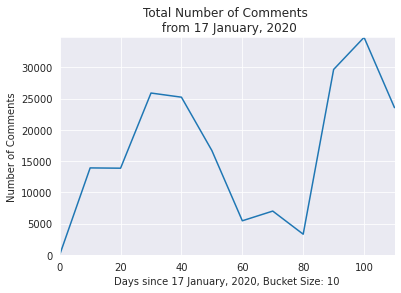

In [164]:
# Total # of Comments
def comments_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date)].shape[0]
number_of_comments = [0] + [comments_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                   min_date +timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_comments))
##############################################################
save_metric(plt, "total_comments_buckets")
plt.show()

In [84]:
for i in range(0, len(ratios)):
    print("Threshold >= , ", agreement_scores[i] ," => True positive rate = ", ratios[i])

Threshold >= ,  0.5  => True positive rate =  0.1952537290282553
Threshold >= ,  0.55  => True positive rate =  0.21237281791268248
Threshold >= ,  0.6  => True positive rate =  0.23925429600255252
Threshold >= ,  0.65  => True positive rate =  0.2746842530952529
Threshold >= ,  0.7000000000000001  => True positive rate =  0.33244907626717196
Threshold >= ,  0.75  => True positive rate =  0.39155596475075627
Threshold >= ,  0.8  => True positive rate =  0.5028319697923223
Threshold >= ,  0.85  => True positive rate =  0.7185405807892777
Threshold >= ,  0.9  => True positive rate =  0.7844112769485904
Threshold >= ,  0.9500000000000001  => True positive rate =  0.8652482269503546


## Total Number of Moderator Removals

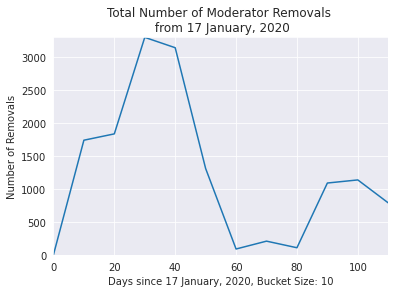

In [165]:
# Total Number of Moderator Removals
def comments_moderated_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.banned_by.notnull())].shape[0]
number_of_moderated_comments = [0] + [comments_moderated_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                   min_date + timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_moderated_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_moderated_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Moderator Removals \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Removals')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_moderated_comments))
##############################################################
save_metric(plt, "total_moderator_removals")
plt.show()

## Rate of Moderator Removals

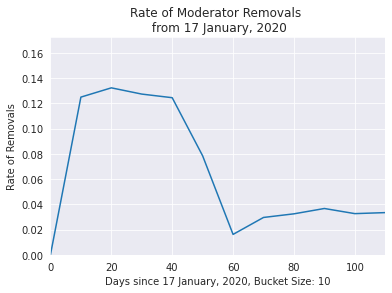

In [166]:
# Rate of Moderator Removals
rate_of_moderated_comments = normalize_rate(number_of_moderated_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_moderated_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_moderated_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Moderator Removals \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Removals')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(rate_of_moderated_comments)+0.04)
##############################################################
save_metric(plt, "rate_of_removals")
plt.show()

## Total Number of Crossmod Reports

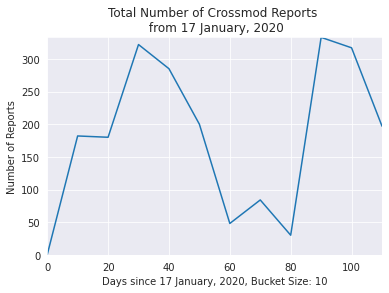

In [167]:
# Total Number of Crossmod Reports
def comments_reported_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report")].shape[0]
##############################################################
number_of_reported_comments = [0] + [comments_reported_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                   min_date + timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Crossmod Reports \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
save_metric(plt, "total_crossmod_reports")
plt.show()

## Rate of Crossmod Reports

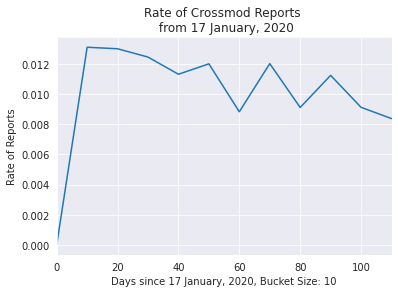

In [168]:
# Rate of Crossmod Reports
rate_of_reported_comments = normalize_rate(number_of_reported_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_reported_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_reported_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Crossmod Reports \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
##############################################################
save_metric(plt, "rate_of_reports")
plt.show()

## Total Number of Report Removal Sequences

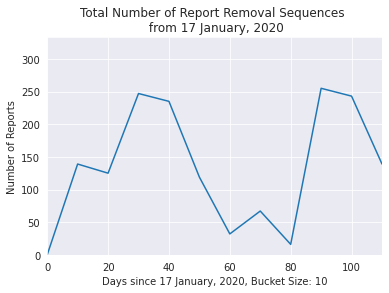

In [169]:
# Total Number of Report Removal Sequences
def comments_reported_and_removed_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report") & (df.banned_by.notnull())].shape[0]
##############################################################
number_of_reported_and_removed_comments = [0] + [comments_reported_and_removed_between_dates(min_date + timedelta(days = dates[i - 1]),
                                                   min_date + timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_and_removed_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_and_removed_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Report Removal Sequences \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
save_metric(plt, "total_report_removal_seq")
plt.show()

## Rate of Report Removal Sequences

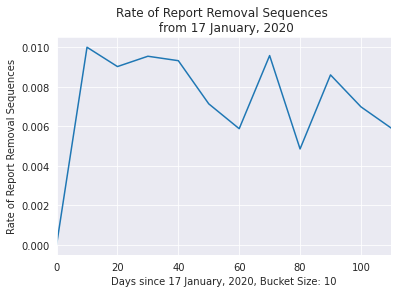

In [170]:
# Rate of Report Removal Sequences
rate_of_report_removal_sequences = normalize_rate(number_of_reported_and_removed_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_report_removal_sequences'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_report_removal_sequences}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Report Removal Sequences \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Report Removal Sequences')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
##############################################################
save_metric(plt, "rate_of_report_removal_seq")
plt.show()

## Comment Threads

Here, we want to see if Crossmod could help identify particularly controversial threads, i.e. are there posts and threads that have particularly high agreement scores that also have high moderator action and can crossmod action / higher agreement score mean or median be correlated with higher moderator action

In [141]:
# Posts

post_values = []
posts_collected = 0

# Group by link_id to gather comments for the same post together
for name, group in df.groupby('link_id'):
    posts_collected += 1
    
    # discard posts with only a single comment
    if len(group) == 1:
        continue
    
    discarding_zeros = list(filter(lambda x: x > 0, group['agreement_score']))
    
    # discard if all the comments are filtered (agreement score -1.0)
    if len(discarding_zeros) == 0:
        continue

    total_thread = len(group)
    moderator_removed = len(group[group.banned_by.notna()])
    automoderator_removed = len(group[group.banned_by == "AutoModerator"])
    human_moderator_removed =  moderator_removed - automoderator_removed
    crossmod_removed = len(group[group.crossmod_action == "report"])
    
    post_values.append([np.mean(discarding_zeros),
                          np.median(discarding_zeros),
                          np.max(discarding_zeros),
                          total_thread,
                          moderator_removed,
                          automoderator_removed,
                          human_moderator_removed,
                          crossmod_removed])

print("Posts collected:", posts_collected)
print("Interesting posts:", len(post_values))

post_df = pd.DataFrame(np.array(post_values),
                         columns = ['mean_agreement_score',
                                    'median_agreement_score',
                                    'max_agreement_score',
                                    'total_comments',
                                    'moderator_removed',
                                    'automoderator_removed',
                                    'human_moderator_removed',
                                    'crossmod_reports']) \
               .sort_values(by = ['human_moderator_removed', 'total_comments', 'crossmod_reports'],
                            ascending = [ False, False, False ])
display(post_df)

crossmod_moderator_correlation = post_df['crossmod_reports'].corr(post_df['moderator_removed'])
crossmod_automoderator_correlation = post_df['crossmod_reports'].corr(post_df['automoderator_removed'])
crossmod_human_correlation = post_df['crossmod_reports'].corr(post_df['human_moderator_removed'])
agreement_score_moderator_correlation = post_df['median_agreement_score'].corr(post_df['moderator_removed'])

print("Correlation between Crossmod action and any moderator action", crossmod_moderator_correlation)
print("Correlation between Crossmod action and automoderator action", crossmod_automoderator_correlation)
print("Correlation between Crossmod action and human action", crossmod_human_correlation)
print("Correlation between median agreement score and any moderator action", agreement_score_moderator_correlation)


Posts collected: 4910
Interesting posts: 3365


,mean_agreement_score,median_agreement_score,max_agreement_score,total_comments,moderator_removed,automoderator_removed,human_moderator_removed,crossmod_reports
1806,0.354223,0.310,0.97,2554.0,230.0,11.0,219.0,64.0
1312,0.309785,0.280,0.96,560.0,178.0,0.0,178.0,7.0
143,0.332627,0.300,0.97,2557.0,406.0,240.0,166.0,44.0
2097,0.313023,0.270,0.99,2747.0,165.0,7.0,158.0,43.0
2127,0.275512,0.230,0.96,5728.0,160.0,11.0,149.0,49.0
...,...,...,...,...,...,...,...,...
3343,0.440000,0.440,0.44,2.0,0.0,0.0,0.0,0.0
3350,0.050000,0.050,0.05,2.0,0.0,0.0,0.0,0.0
3361,0.400000,0.400,0.40,2.0,0.0,0.0,0.0,0.0
3362,0.675000,0.675,0.83,2.0,0.0,0.0,0.0,0.0


Correlation between Crossmod action and any moderator action 0.8198444984768654
Correlation between Crossmod action and automoderator action 0.6391120108869968
Correlation between Crossmod action and human action 0.8278654287330356
Correlation between median agreement score and any moderator action 0.04092886002055387


In [144]:
# Threads

thread_values = []
threads_collected = 0

# Group by link_id to gather comments for the same post together
for name, group in df.groupby('parent_id'):
    threads_collected += 1
    
    discarding_zeros = list(filter(lambda x: x > 0, group['agreement_score']))
    
    # discard if all the comments are filtered (agreement score -1.0)
    if len(discarding_zeros) == 0:
        continue

    total_thread = len(group)
    moderator_removed = len(group[group.banned_by.notna()])
    automoderator_removed = len(group[group.banned_by == "AutoModerator"])
    human_moderator_removed =  moderator_removed - automoderator_removed
    crossmod_removed = len(group[group.crossmod_action == "report"])
    thread_values.append([np.mean(discarding_zeros),
                          np.median(discarding_zeros),
                          np.max(discarding_zeros),
                          total_thread,
                          moderator_removed,
                          automoderator_removed,
                          human_moderator_removed,
                          crossmod_removed])

print("Threads collected:", threads_collected)
print("Threads:", len(thread_values))

thread_df = pd.DataFrame(np.array(thread_values),
                         columns = ['mean_agreement_score',
                                    'median_agreement_score',
                                    'max_agreement_score',
                                    'total_comments',
                                    'moderator_removed',
                                    'automoderator_removed',
                                    'human_moderator_removed',
                                    'crossmod_reports']) \
               .sort_values(by = ['human_moderator_removed', 'total_comments', 'crossmod_reports'],
                            ascending = [ False, False, False ])
display(thread_df)

crossmod_moderator_correlation = thread_df['crossmod_reports'].corr(thread_df['moderator_removed'])
crossmod_automoderator_correlation = thread_df['crossmod_reports'].corr(thread_df['automoderator_removed'])
crossmod_human_correlation = thread_df['crossmod_reports'].corr(thread_df['human_moderator_removed'])
agreement_score_moderator_correlation = thread_df['median_agreement_score'].corr(thread_df['moderator_removed'])

print("Correlation between Crossmod action and any moderator action", crossmod_moderator_correlation)
print("Correlation between Crossmod action and automoderator action", crossmod_automoderator_correlation)
print("Correlation between Crossmod action and human action", crossmod_human_correlation)
print("Correlation between median agreement score and any moderator action", agreement_score_moderator_correlation)


Threads collected: 122802
Threads: 121402


,mean_agreement_score,median_agreement_score,max_agreement_score,total_comments,moderator_removed,automoderator_removed,human_moderator_removed,crossmod_reports
120366,0.325672,0.29,0.92,238.0,52.0,1.0,51.0,3.0
118338,0.461833,0.44,0.98,682.0,266.0,230.0,36.0,45.0
120785,0.349095,0.32,0.94,663.0,32.0,5.0,27.0,15.0
118839,0.306019,0.27,0.96,1051.0,234.0,214.0,20.0,14.0
120847,0.356367,0.33,0.91,603.0,25.0,5.0,20.0,4.0
...,...,...,...,...,...,...,...,...
121363,0.200000,0.20,0.20,1.0,0.0,0.0,0.0,0.0
121373,0.210000,0.21,0.21,1.0,0.0,0.0,0.0,0.0
121395,0.090000,0.09,0.09,1.0,0.0,0.0,0.0,0.0
121396,0.590000,0.59,0.59,1.0,0.0,0.0,0.0,0.0


Correlation between Crossmod action and any moderator action 0.6942449490904722
Correlation between Crossmod action and automoderator action 0.6534080124997111
Correlation between Crossmod action and human action 0.518479401768734
Correlation between median agreement score and any moderator action 0.03458416219636929


In [ ]:
# Threads, combined text CSV
import csv

filepath = "/data/databases/threads.csv"

with open(filepath, 'w') as csvfile:    
thread_values = []
threads_collected = 0

# Group by link_id to gather comments for the same post together
for name, group in df.groupby('parent_id'):
    
    discarding_zeros = list(filter(lambda x: x > 0, group['agreement_score']))
    
    # discard if all the comments are filtered (agreement score -1.0)
    if len(discarding_zeros) == 0:
        continue

    total_thread = len(group)
    moderator_removed = len(group[group.banned_by.notna()])
    automoderator_removed = len(group[group.banned_by == "AutoModerator"])
    human_moderator_removed =  moderator_removed - automoderator_removed
    crossmod_removed = len(group[group.crossmod_action == "report"])
    combined_text = " ".join(group["body"])
    parent_id = group['parent_id'][0]
    
    thread_values.append([np.mean(discarding_zeros),
                          np.median(discarding_zeros),
                          np.max(discarding_zeros),
                          total_thread,
                          moderator_removed,
                          automoderator_removed,
                          human_moderator_removed,
                          crossmod_removed,
                          combined_text,
                          parent_id,
                          link_id,
                          comment_ids])
    
    threads_collected += 1


## Perspective API

,created_utc,ingested_utc,id,body,crossmod_action,author,subreddit,banned_by,banned_at_utc,agreement_score,norm_violation_score,link_id,parent_id,created,ingested,freq
8,2020-01-22 19:43:09.000000,2020-01-22 19:43:13.507499,ff9v6x7,Excuuuuuse me for not knowing EVERYTHING like ...,report,MeatsackKY,Futurology,NaN,NaN,0.90,0.125,t3_esb5vl,t1_ff9hun1,2020-01-22 19:43:09,2020-01-22 19:43:13,4
480,2020-01-23 02:14:03.000000,2020-01-23 02:14:20.406346,ffavsli,No one cares that you’re a bad person AND unfa...,report,WaterySeamen,Futurology,NaN,NaN,0.92,0.375,t3_erbtjy,t1_ff6bzl4,2020-01-23 02:14:03,2020-01-23 02:14:20,1
518,2020-01-23 02:42:12.000000,2020-01-23 02:42:24.982265,ffaycey,Keep breeding you cunts!,report,Suchaputz,Futurology,lughnasadh,2020-01-23 18:36:20.000000,0.86,0.125,t3_esiofj,t3_esiofj,2020-01-23 02:42:12,2020-01-23 02:42:24,1
673,2020-01-23 04:19:42.000000,2020-01-23 04:19:50.950950,ffb6lsu,Get the fuck out nazi,report,ZonkErryday,Futurology,lughnasadh,2020-01-23 18:33:13.000000,0.87,0.500,t3_esiofj,t1_ffb5x26,2020-01-23 04:19:42,2020-01-23 04:19:50,1
917,2020-01-23 06:37:28.000000,2020-01-23 06:37:35.760920,ffbe5g5,You're in denial or you're fucking clueless,report,GunnyH1GHway,Futurology,lughnasadh,2020-01-23 18:36:03.000000,0.88,1.000,t3_erjgqm,t1_ff5yhkx,2020-01-23 06:37:28,2020-01-23 06:37:35,6


In [307]:
report = df[df.crossmod_action == "report"]


In [314]:
import json 
import requests 
import time
import os.environ
def get_api_score(row):
    text = row["body"]
    api_key = os.environ["VICTOR_PERSPECTIVE_API_KEY"]
    url = ('https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze' +    
        '?key=' + api_key)
    data_dict = {
        'comment': {'text': text},
        'languages': ['en'],
        'requestedAttributes': {
            'TOXICITY': {},
            'SEVERE_TOXICITY': {},
            'TOXICITY_FAST': {},
            'IDENTITY_ATTACK': {},
            'INSULT': {},
            'PROFANITY': {},
            'THREAT': {},
            'SEXUALLY_EXPLICIT': {},
            'FLIRTATION': {},
        }
    }
    response = requests.post(url=url, data=json.dumps(data_dict)) 
    response_dict = json.loads(response.content)
    print(json.dumps(response_dict["attributeScores"], indent=4, sort_keys=False))
    time.sleep(10)
#     try:
#         score = response_dict["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
#         return score
#     except:
#         print(response_dict)
#         return -1
    
report["perspective_score"] = report.apply(lambda row: get_api_score(row), axis=1)

{
    "TOXICITY": {
        "spanScores": [
            {
                "begin": 0,
                "end": 84,
                "score": {
                    "value": 0.960198,
                    "type": "PROBABILITY"
                }
            }
        ],
        "summaryScore": {
            "value": 0.960198,
            "type": "PROBABILITY"
        }
    },
    "SEVERE_TOXICITY": {
        "spanScores": [
            {
                "begin": 0,
                "end": 84,
                "score": {
                    "value": 0.80863106,
                    "type": "PROBABILITY"
                }
            }
        ],
        "summaryScore": {
            "value": 0.80863106,
            "type": "PROBABILITY"
        }
    },
    "THREAT": {
        "spanScores": [
            {
                "begin": 0,
                "end": 84,
                "score": {
                    "value": 0.5653524,
                    "type": "PROBABILITY"
                }
           

KeyboardInterrupt: 

In [288]:
report.head()

,created_utc,ingested_utc,id,body,crossmod_action,author,subreddit,banned_by,banned_at_utc,agreement_score,norm_violation_score,link_id,parent_id,created,ingested,freq,perspective_score
8,2020-01-22 19:43:09.000000,2020-01-22 19:43:13.507499,ff9v6x7,Excuuuuuse me for not knowing EVERYTHING like ...,report,MeatsackKY,Futurology,NaN,NaN,0.90,0.125,t3_esb5vl,t1_ff9hun1,2020-01-22 19:43:09,2020-01-22 19:43:13,4,0.960198
480,2020-01-23 02:14:03.000000,2020-01-23 02:14:20.406346,ffavsli,No one cares that you’re a bad person AND unfa...,report,WaterySeamen,Futurology,NaN,NaN,0.92,0.375,t3_erbtjy,t1_ff6bzl4,2020-01-23 02:14:03,2020-01-23 02:14:20,1,0.660660
518,2020-01-23 02:42:12.000000,2020-01-23 02:42:24.982265,ffaycey,Keep breeding you cunts!,report,Suchaputz,Futurology,lughnasadh,2020-01-23 18:36:20.000000,0.86,0.125,t3_esiofj,t3_esiofj,2020-01-23 02:42:12,2020-01-23 02:42:24,1,0.959148
673,2020-01-23 04:19:42.000000,2020-01-23 04:19:50.950950,ffb6lsu,Get the fuck out nazi,report,ZonkErryday,Futurology,lughnasadh,2020-01-23 18:33:13.000000,0.87,0.500,t3_esiofj,t1_ffb5x26,2020-01-23 04:19:42,2020-01-23 04:19:50,1,0.967988
917,2020-01-23 06:37:28.000000,2020-01-23 06:37:35.760920,ffbe5g5,You're in denial or you're fucking clueless,report,GunnyH1GHway,Futurology,lughnasadh,2020-01-23 18:36:03.000000,0.88,1.000,t3_erjgqm,t1_ff5yhkx,2020-01-23 06:37:28,2020-01-23 06:37:35,6,0.969731


In [286]:
fn = []
fp = []
for index, row in report.iterrows():
    if row['perspective_score'] - row['agreement_score'] > 0.3:
        fn.append(row)
    elif row['perspective_score'] - row['agreement_score'] < -0.3:
        fp.append(row)
fn = pd.DataFrame(fn)
fp = pd.DataFrame(fp)

In [305]:
print("false positive rate: ", fp.shape[0] / report.shape[0])

false positive rate:  0.20662695457930008


In [318]:
report.plot(x='perspective_score', y='agreement_score', style='o')

KeyError: 'perspective_score'

In [319]:
report.head()

,created_utc,ingested_utc,id,body,crossmod_action,author,subreddit,banned_by,banned_at_utc,agreement_score,norm_violation_score,link_id,parent_id,created,ingested,freq
8,2020-01-22 19:43:09.000000,2020-01-22 19:43:13.507499,ff9v6x7,Excuuuuuse me for not knowing EVERYTHING like ...,report,MeatsackKY,Futurology,NaN,NaN,0.90,0.125,t3_esb5vl,t1_ff9hun1,2020-01-22 19:43:09,2020-01-22 19:43:13,4
480,2020-01-23 02:14:03.000000,2020-01-23 02:14:20.406346,ffavsli,No one cares that you’re a bad person AND unfa...,report,WaterySeamen,Futurology,NaN,NaN,0.92,0.375,t3_erbtjy,t1_ff6bzl4,2020-01-23 02:14:03,2020-01-23 02:14:20,1
518,2020-01-23 02:42:12.000000,2020-01-23 02:42:24.982265,ffaycey,Keep breeding you cunts!,report,Suchaputz,Futurology,lughnasadh,2020-01-23 18:36:20.000000,0.86,0.125,t3_esiofj,t3_esiofj,2020-01-23 02:42:12,2020-01-23 02:42:24,1
673,2020-01-23 04:19:42.000000,2020-01-23 04:19:50.950950,ffb6lsu,Get the fuck out nazi,report,ZonkErryday,Futurology,lughnasadh,2020-01-23 18:33:13.000000,0.87,0.500,t3_esiofj,t1_ffb5x26,2020-01-23 04:19:42,2020-01-23 04:19:50,1
917,2020-01-23 06:37:28.000000,2020-01-23 06:37:35.760920,ffbe5g5,You're in denial or you're fucking clueless,report,GunnyH1GHway,Futurology,lughnasadh,2020-01-23 18:36:03.000000,0.88,1.000,t3_erjgqm,t1_ff5yhkx,2020-01-23 06:37:28,2020-01-23 06:37:35,6
